# Visualization with Seaborn

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Python for Data Analysis, by Wes McKinney*.  
Seaborn is a high level which is built on matplotlib.
    

Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas `DataFrame`

Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's `set()` method. By convention, Seaborn is imported as `sns`

In [1]:
import seaborn as sns
sns.set()
#sns.set_style()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), axis = 0)

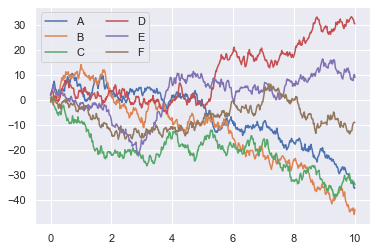

In [4]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')

### Exploring Seaborn Plots
The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient

### Histograms, KDE, and Densities
Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. Below is a plot using Mathplotlib

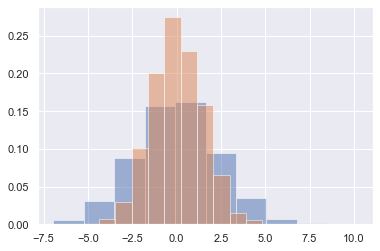

In [11]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size = 3000)
data = pd.DataFrame(data, columns = ['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density = True, alpha = 0.5)
#density = True then we normalize. If it is false it dispay the count.

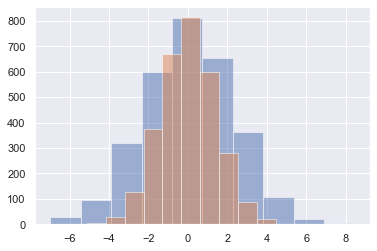

In [10]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size = 3000)
data = pd.DataFrame(data, columns = ['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density = False, alpha = 0.5)

We can also draw histograms using seaborn's `displot` or `histplot`. `displot` is a figure-level interface for drawing distribution plots onto a `FacetGrid`. It provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. The `kind` parameter selects the approach to use

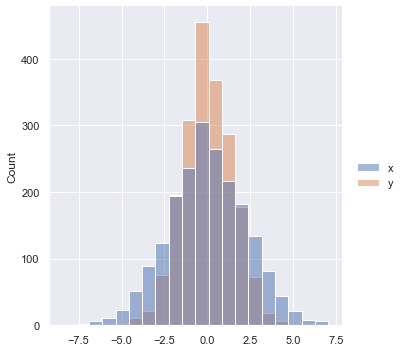

In [6]:
#sns.displot(data)
sns.displot(data, bins = 20, alpha = 0.5)

In [15]:
#sns.displot(data)
sns.displot(data x = x, bins = 20, alpha = 0.5)

SyntaxError: invalid syntax (Temp/ipykernel_10928/2721453498.py, line 2)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation by setting `kind = kde`

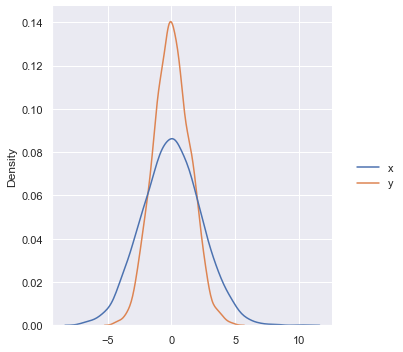

In [16]:
sns.displot(data, kind = 'kde') #kde=kernal density distribution

Histograms and KDE can be combined by setting `kde = True`

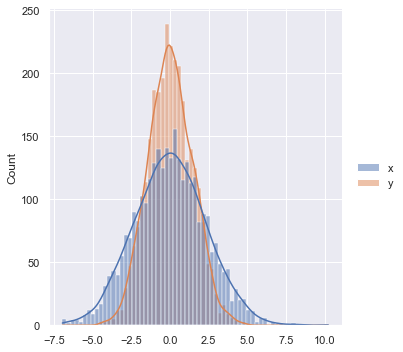

In [17]:
sns.displot(data, kde = True)

We can see the joint distribution and the marginal distributions together using `sns.jointplot`. For this plot, we'll set the style to a white background

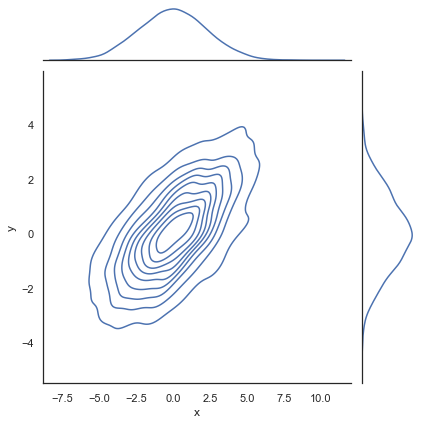

In [18]:
with sns.axes_style('white'):
    sns.jointplot(data = data, x = 'x', y = 'y', kind = 'kde')

There are other parameters that can be passed to `jointplot`. For example, we can use a hexagonally based histogram instead:

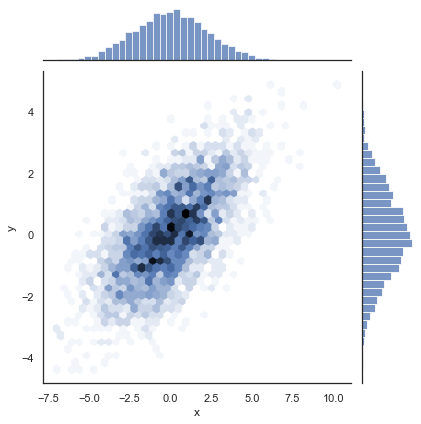

In [19]:
with sns.axes_style('white'):
    sns.jointplot(data = data, x = 'x', y = 'y', kind = 'hex')

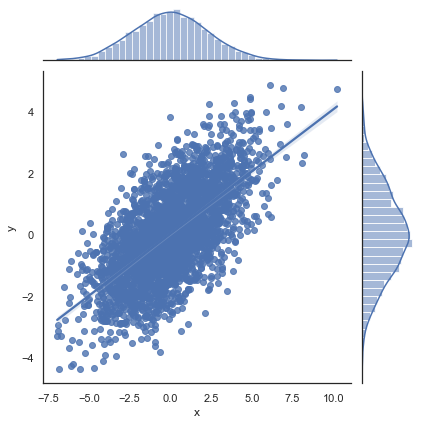

In [21]:
with sns.axes_style('white'):
    sns.jointplot(data = data, x = 'x', y = 'y', kind = 'reg') #jointplot=joint distribution of 2 varaibles

### Pair Plots
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species

In [22]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Visualizing the multidimensional relationships among the samples is as easy as calling `sns.pairplot`

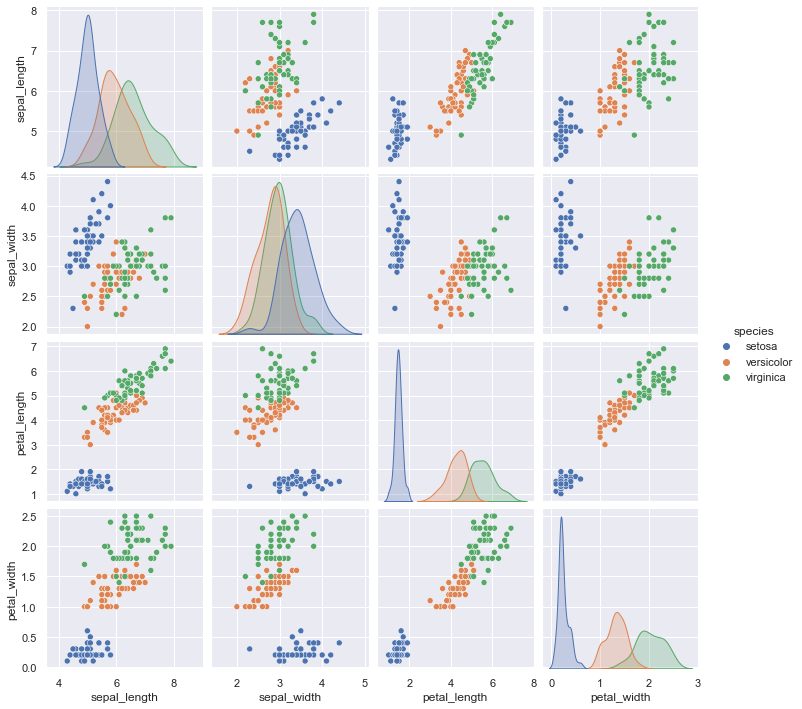

In [23]:
sns.pairplot(iris, hue = 'species', height = 2.5) 
#pairplot automatically draw the subplots and no need to mention manually.Work for morethan 2 variables.

### Faceted Histograms
Sometimes the best way to view data is via histograms of subsets. Seaborn's `FacetGrid` makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data

In [25]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


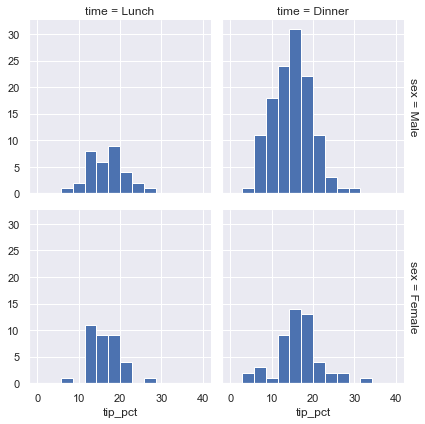

In [26]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row = "sex", col = "time", margin_titles = True)
grid.map(plt.hist, "tip_pct", bins = np.linspace(0, 40, 15))

Draw the same plot using `displot`

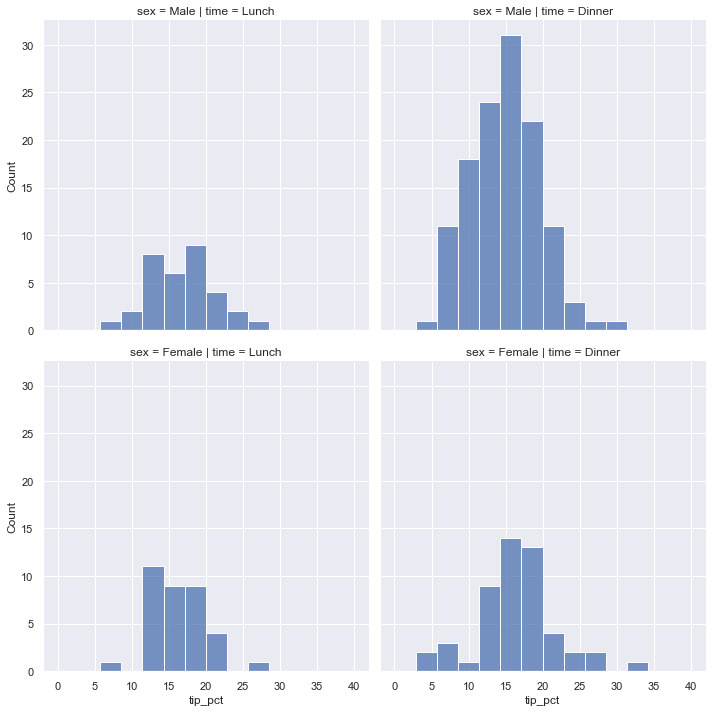

In [27]:
sns.displot(tips, x = 'tip_pct', row = 'sex', col = 'time', bins = np.linspace(0, 40, 15))

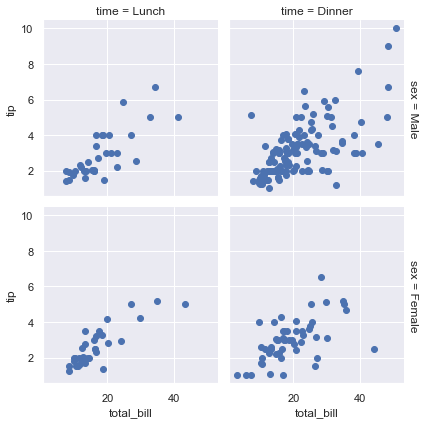

In [28]:
grid = sns.FacetGrid(tips, row = "sex", col = "time", margin_titles = True)
grid.map(plt.scatter, 'total_bill', 'tip')

### Categorical Plots

### Bar Plot
`x` categorical column, `y` numerical column

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

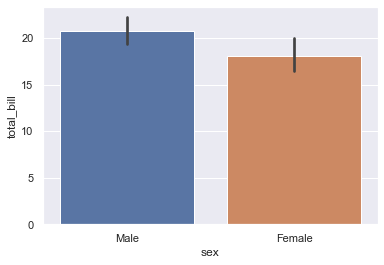

In [29]:
# default estimator is mean
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

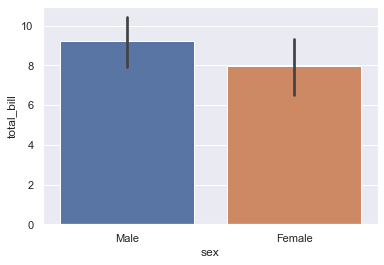

In [30]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

It is important to keep in mind that a bar plot shows only the `mean` (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

### Count Plot
`countplot` shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for `barplot()`, so you can compare counts across nested variables

In [32]:
tips['sex'].count()

244

In [35]:
temp=tips['sex'].value_counts()

In [ ]:
plt.plot(temp,kind=)

<AxesSubplot:xlabel='sex', ylabel='count'>

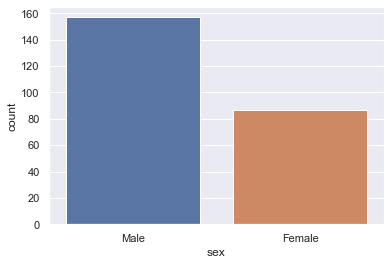

In [31]:
# y is fixed to count the occurences
sns.countplot(x = 'sex', data = tips)

### Box Plots
`boxplot` draws a box plot to show distributions with respect to categories. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range

<AxesSubplot:xlabel='day', ylabel='total_bill'>

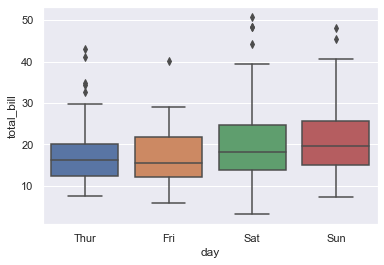

In [36]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

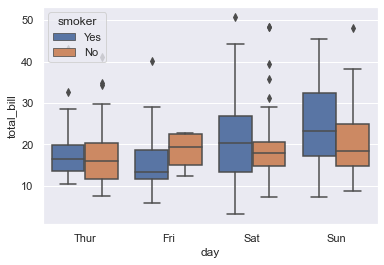

In [37]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')

### Cat Plots
Cat plots can be useful for this kind of visualization as well. `catplot` is a figure-level interface for drawing categorical plots onto a `FacetGrid`. It provides access to several axes-level functions that show **the relationship between a numerical and one or more categorical variables** using one of several visual representations. The `kind` parameter selects the underlying axes-level function to use. This is a general plot which can be used to plot many of the plots we have covered.

In [ ]:
with sns.axes_style(style = 'ticks'):
    sns.catplot(x = "day", y = "total_bill", hue = "sex", data = tips, kind = "box")
   

### Violin Plots
`violinplot` draws a combination of boxplot and kernel density estimate. A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution

In [ ]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)

In [ ]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)

### Joint Distributions
Similar to the pairplot we saw earlier, we can use sns.jointplot to show the joint distribution between different datasets, along with the associated marginal distributions

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = 'hex')

The joint plot can even do some automatic kernel density estimation and regression

In [ ]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = 'reg')

### Bar Plots
Time series can be plotted using `sns.catplot`. In the following example, we'll use the Planets data that we first saw in the Pandas chapter

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x = "year", data = planets, aspect = 2,
                       kind = "count", color = 'steelblue')
    #g.set_xticklabels(step = 5)

We can learn more by looking at the method of discovery of each of these planets

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x = "year", data = planets, aspect = 4.0, kind = 'count',
                       hue = 'method', order = range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### Matrix Plots

`heatmap` plots rectangular data as a color-encoded matrix

In [ ]:
tips.head()

In [ ]:
tc = tips.corr()

In [ ]:
tc

In [ ]:
sns.heatmap(tc)

In [ ]:
sns.heatmap(tc, annot = True)

In [ ]:
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

In [ ]:
f = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
f

In [ ]:
sns.heatmap(f, cmap = 'coolwarm')

In [ ]:
sns.heatmap(f, cmap = 'coolwarm', linecolor = 'white', linewidths = 1)

### Cluster Map
`clustermap` plots a matrix dataset as a hierarchically-clustered heatmap

In [ ]:
sns.clustermap(f, cmap = 'coolwarm')

In [ ]:
sns.clustermap(f, cmap = 'coolwarm', standard_scale = 1)

### PairGrid
Subplot grid for plotting pairwise relationships in a dataset. This object maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal. Several different common plots can be generated in a single line using `pairplot()`. Use `PairGrid` when you need more flexibility

In [ ]:
# vars: list of variable names. Variables within data to use, otherwise use every column with a numeric datatype
g = sns.PairGrid(iris)
g.map(plt.scatter)

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### lmplot
`lmplot` plots data and regression model fits across a `FacetGrid`. This function combines `regplot()` and `FacetGrid`. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset

In [ ]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

In [ ]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

In [ ]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', '*'])

In [ ]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', '*'], scatter_kws = {'s': 120})

In [ ]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, row = 'time', col = 'sex')

### Example: Exploring Marathon Finishing Times
Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon. We will start by downloading the data from the Web, and loading it into Pandas

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [ ]:
import pandas as pd
data = pd.read_csv('marathon-data.csv')
data.head()

By default, Pandas loaded the `time` columns as Python strings (type `object`); we can see this by looking at the `dtypes` attribute of the `DataFrame`

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum() # check any value missing in the dataset

Let's fix this by providing a converter for the times

In [ ]:
data = pd.read_csv('marathon-data.csv',
                   converters = {'split':pd.to_timedelta, 'final':pd.to_timedelta})
data.head()

In [ ]:
data.dtypes

That looks much better. For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds

In [ ]:
data['split_sec'] = data['split'].map(lambda x : x.total_seconds())
data['final_sec'] = data['final'].map(lambda x : x.total_seconds())
data.head()

To get an idea of what the data looks like, we can plot a `jointplot` over the data

In [ ]:
import numpy as np
import seaborn as sns
with sns.axes_style('white'):
    g = sns.jointplot(x = "split_sec", y = "final_sec", data = data, kind = 'hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

Where this split difference is less than zero, the person negative-split the race by that fraction. Let's do a distribution plot of this split fraction

In [ ]:
sns.distplot(data['split_frac'], kde = False)
plt.axvline(0, color = "k", linestyle = "--")

In [ ]:
sum(data.split_frac < 0)

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon. Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a `pairgrid`, which draws plots of all these correlations

In [ ]:
g = sns.PairGrid(data, vars = ['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue = 'gender', palette = 'RdBu_r')
g.map(plt.scatter, alpha = 0.8)
g.add_legend()

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time. The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label = 'men', shade = True)
sns.kdeplot(data.split_frac[data.gender=='W'], label = 'women', shade = True)
plt.xlabel('split_frac')

The interesting thing here is that there are many more men than women who are running close to an even split! This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age. A nice way to compare distributions is to use a violin plot

In [ ]:
sns.violinplot(x = "gender", y = "split_frac", data = data,
               palette=["lightblue", "lightpink"])

This is yet another way to compare the distributions between men and women. Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style = None):
    sns.violinplot(x = "age_dec", y = "split_frac", hue = "gender", data = data,
                   split = True, inner = "quartile",
                   palette = ["lightblue", "lightpink"])

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range

In [ ]:
(data.age > 80).sum()

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use `lmplot`, which will automatically fit a linear regression to the data. ` lmplot` plots data and regression model fits across a FacetGrid. It combines `regplot()` and `FacetGrid`. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset 

In [ ]:
g = sns.lmplot(x = 'final_sec', y = 'split_frac', col = 'gender', data = data,
               markers = ".", scatter_kws = dict(color = 'c'))
g.map(plt.axhline, y = 0.1, color = "k", ls = ":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
sns.histplot(tips['total_bill'])